#PROJETO EXTENSIONISTA

#Analisando alugueis de casas no Rio de Janeiro


#Analisando os dados da tabela
Bem-vindo ao projeto de análise de dados de aluguéis! Neste ambiente, exploraremos um conjunto de dados relacionado a aluguéis de propriedades e utilizaremos o Google Colab, uma plataforma poderosa baseada em Python, para conduzir nossa análise...
vamos começar a nossa jornada de análise de dados e desvendar o potencial oculto por trás dos números. Fique à vontade para interagir com o código, fazer perguntas e compartilhar suas descobertas ao longo do caminho. Vamos mergulhar fundo na análise de dados de aluguéis!


##dados brutos

In [ ]:
import pandas as pd
import seaborn as sns

dados = pd.read_csv('/content/drive/MyDrive/aluguel.csv', sep = ';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [ ]:
# Informação sobre o tipo de dados de cada coluna
pd.DataFrame(dados.dtypes, columns = ['Tipos de Dados'])


,Tipos de Dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


#Recolhendo os 10 primeiros imoveis e os 10 ultimos

In [ ]:

dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [ ]:
dados.tail(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32950,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32952,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


#TIPOS DE IMÓVEIS

####Mostramos os tipos de imóveis disponiveis dentro da tabela retirando imóveis que estavam duplicado e criando [dataframe](https://www.databricks.com/br/glossary/what-are-dataframes#:~:text=O%20que%20é%20um%20DataFrame,e%20colunas%2C%20como%20uma%20planilha.) com o tipo de imóvel para melhor visualização e organização.

In [ ]:
import pandas as pd


dados.head(50)

tipo_de_imovel= dados['Tipo']
tipo_de_imovel.drop_duplicates()

tipo_de_imovel.drop_duplicates(inplace = True)
tipo_de_imovel


0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

In [ ]:
tipo_de_imovel=pd.DataFrame(tipo_de_imovel)
tipo_de_imovel.columns.name='id'
tipo_de_imovel.reset_index='id'
tipo_de_imovel

id,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


#Coletando os imóveis que posuem maior procura na tabela

####Quantidade de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'

In [ ]:
selecao = (dados['Tipo'] == 'Casa') | (dados['Tipo'] == 'Casa de Condomínio') | (dados['Tipo'] == 'Casa de Vila')
n2 = dados[selecao].shape[0]
n2

2212

####Quantidade de imóveis classificados com tipos 'Quitinete', 'Sítio' e 'Flat'

In [ ]:
selecao2 = (dados['Tipo'] == 'Quitinete') | (dados['Tipo'] == 'Sítio') | (dados['Tipo'] == 'Flat')
n3 = dados[selecao2].shape[0]
n3

1322

#Analisando Valores

####retirando valores duplicados

In [ ]:
Valor_do_imovel = dados['Valor']
Valor_do_imovel.drop_duplicates()

Valor_do_imovel.drop_duplicates(inplace = True)
Valor_do_imovel


0         1700.0
1         7000.0
2         5200.0
3          800.0
5         1200.0
          ...   
32582       84.0
32664     2351.0
32857     7812.0
32884    95784.0
32889    53730.0
Name: Valor, Length: 1415, dtype: float64

####criando [dataframe](https://www.databricks.com/br/glossary/what-are-dataframes#:~:text=O%20que%20é%20um%20DataFrame,e%20colunas%2C%20como%20uma%20planilha.) com os valores do apartamento

In [ ]:
Valor_do_imovel=pd.DataFrame(Valor_do_imovel)
Valor_do_imovel.columns.name = 'id'
Valor_do_imovel.head(10)

id,Valor
0,1700.0
1,7000.0
2,5200.0
3,800.0
5,1200.0
6,1300.0
7,22000.0
8,1000.0
9,35000.0
11,1500.0


In [ ]:
Valor_do_imovel=pd.DataFrame(Valor_do_imovel)
Valor_do_imovel.columns.name = 'id'
Valor_do_imovel.tail(10)

id,Valor
32484,375000.0
32492,49638.0
32506,684.0
32529,85500.0
32550,78500.0
32582,84.0
32664,2351.0
32857,7812.0
32884,95784.0
32889,53730.0


In [ ]:
#Selecionando os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.

selecao = (dados['Quartos'] >= 4) & (dados['Valor'] < 2000)
n4 = dados[selecao].shape[0]
n4

43

In [ ]:
#Selecionando os imóveis que tenham valor valor entre 15000 a 2500 reaios imoveis que possuam aluguel com valor médio


selecao2 = (dados['Valor'] > 1500) & (dados['Valor'] < 2000)
n4 = dados[selecao2].shape[0]
n4

2743

In [ ]:

#Selecione somente os imóveis classificados com tipo 'Apartamento'.
selecao = dados['Tipo'] == 'Apartamento'
n1 = dados[selecao].shape[0]
n1

19532

In [ ]:

print("Nº de imóveis classificados com tipo 'Apartamento' -> {}".format(n1))
print("Nº de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'-> {}".format(n2))
print("Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> {}".format(n3))
print("Nº de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> {}".format(n4))

Nº de imóveis classificados com tipo 'Apartamento' -> 19532
Nº de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'-> 2212
Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> 1322
Nº de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> 2743


#Analisando valores do IPTU

###Adotamos um parametro para calcular o emlhor imóvel para a pessoa que esteja disposta a comprar um imovel. Adotando os parametros  

In [ ]:
# Exemplo de uso das funções

tipo_imovel= (input("Digite o tipo de imovel:"))
salario_mensal =float(input("Digite seu salario:"))
valor_imovel =float(input("Digite o valor do imovel que deseja:"))
valor_iptu = float(input("Digite o iptu que deseja:"))
valor_condominio = float(input("Digite so valor do condominio que deseja:"))
6



def calcular_custo_total(valor_imovel, valor_iptu, valor_condominio):

    custo_total = valor_imovel + valor_iptu + valor_condominio
    return custo_total

def calcular_restante_salario(salario, custo_total):

    restante_salario = salario - custo_total
    return restante_salario



custo_total = calcular_custo_total(valor_imovel, valor_iptu, valor_condominio)
restante_salario = calcular_restante_salario(salario_mensal, custo_total)

# Exibir o resultado
print(f'O custo total do imóvel é: R${custo_total:.2f}')
print(f'O valor restante do salário é: R${restante_salario:.2f}')





Digite o tipo de imovel:apartamento
Digite seu salario:5000
Digite o valor do imovel que deseja:1500
Digite o iptu que deseja:70
Digite so valor do condominio que deseja:150
O custo total do imóvel é: R$1720.00
O valor restante do salário é: R$3280.00


##Sendo assim o melhor im[ovel para uma pessoa que ganha esse sálario por mês se encaixaria nesses im[oveis abaixo

In [ ]:
#Selecionando somente os imóveis classificados como custo beneficio.
imovel_custobeneficio = dados[dados['Valor'] == 1500]
imovel_custobeneficio.drop_duplicates()

imovel_custobeneficio.head(10)




,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
42,Conjunto Comercial/Sala,Recreio dos Bandeirantes,0,1,0,50,1500.0,250.0,NaN
61,Conjunto Comercial/Sala,Recreio dos Bandeirantes,0,0,0,84,1500.0,1546.0,NaN
74,Casa,Méier,2,0,0,51,1500.0,50.0,NaN
96,Apartamento,Bonsucesso,2,1,0,77,1500.0,740.0,NaN
127,Conjunto Comercial/Sala,Centro,0,0,0,40,1500.0,637.0,84.0
151,Conjunto Comercial/Sala,São Francisco Xavier,0,1,0,27,1500.0,580.0,NaN
163,Apartamento,Barra da Tijuca,2,1,0,58,1500.0,666.0,106.0
191,Apartamento,Botafogo,1,0,0,35,1500.0,470.0,50.0


In [ ]:
#retirando valores nulos da tabela

iptu_valores = imovel_custobeneficio.dropna()
iptu_valores


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
127,Conjunto Comercial/Sala,Centro,0,0,0,40,1500.0,637.0,84.0
163,Apartamento,Barra da Tijuca,2,1,0,58,1500.0,666.0,106.0
191,Apartamento,Botafogo,1,0,0,35,1500.0,470.0,50.0
...,...,...,...,...,...,...,...,...,...
32816,Apartamento,Vila Isabel,2,0,0,62,1500.0,170.0,21.0
32850,Apartamento,Recreio dos Bandeirantes,2,1,1,80,1500.0,746.0,83.0
32879,Conjunto Comercial/Sala,Recreio dos Bandeirantes,0,1,0,32,1500.0,360.0,130.0
32932,Apartamento,Todos os Santos,3,0,0,54,1500.0,289.0,35.0


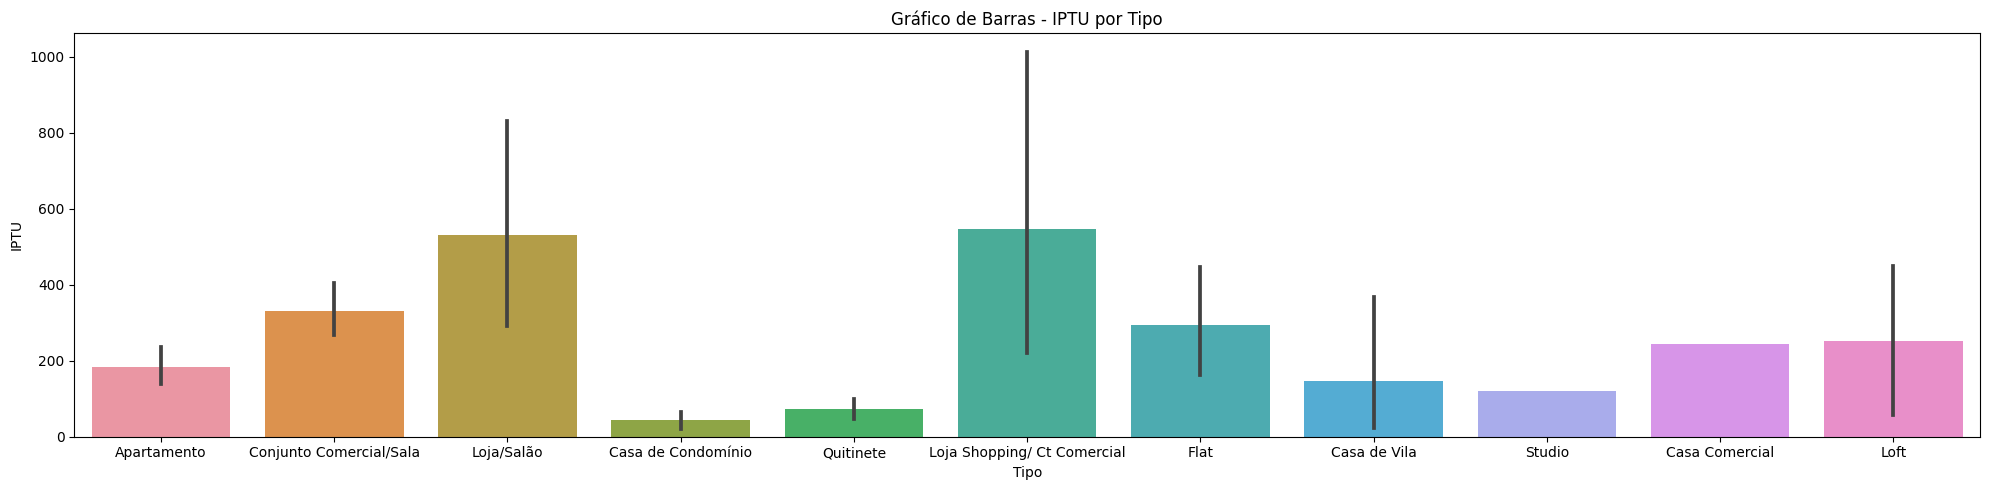

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

sns.barplot(x="Tipo", y="IPTU", data=iptu_valores)

plt.xlabel('Tipo')
plt.ylabel('IPTU')
plt.title('Gráfico de Barras - IPTU por Tipo')

plt.tight_layout()

plt.show()

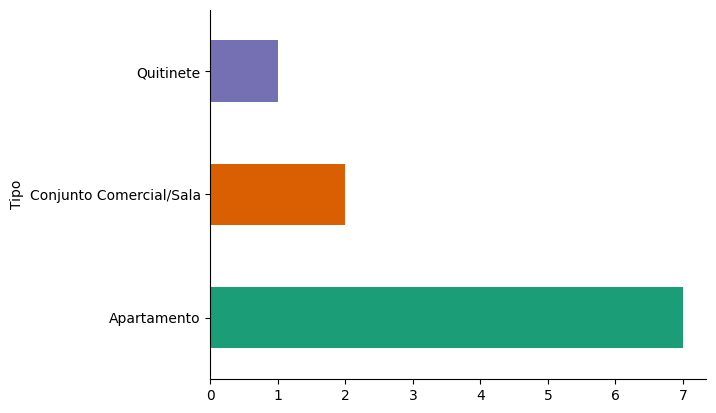

In [ ]:
#Mostrando visualmente o tipo de habitação que possui mais imoveis com custobeneficio

#Imóveis cujo os valores ão até 1500 reais

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Tipo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Avaliando os custos totais da tabela com os valores de Valor,Condominio e IPTU.



In [ ]:
import pandas as pd

# Criar um DataFrame de exemplo
dados

df = pd.DataFrame(dados)

# Função para calcular a soma dos valores
def calcular_soma(row):
    return row['Valor'] + row['Condominio'] + row['IPTU']

# Criar uma nova coluna chamada 'SomaValores' usando a função apply
df['SomaValores'] = df.apply(calcular_soma, axis=1)

# Exibir o DataFrame resultante
print(dados)

                          Tipo                Bairro  Quartos  Vagas  Suites  \
0                    Quitinete            Copacabana        1      0       0   
1                         Casa       Jardim Botânico        2      0       1   
2      Conjunto Comercial/Sala       Barra da Tijuca        0      4       0   
3                  Apartamento                Centro        1      0       0   
4                  Apartamento          Higienópolis        1      0       0   
...                        ...                   ...      ...    ...     ...   
32955                Quitinete                Centro        0      0       0   
32956              Apartamento           Jacarepaguá        3      1       2   
32957              Apartamento  São Francisco Xavier        2      1       0   
32958              Apartamento                Leblon        2      0       0   
32959  Conjunto Comercial/Sala                Centro        0      0       0   

       Area   Valor  Condominio    IPTU

In [ ]:
valores_custos_totais= dados.dropna()
valores_custos_totais.columns
valores_custos_totais.head(10)



,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,SomaValores
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,57223.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0
15,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,15803.0
19,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0,1278.0


In [ ]:
df = pd.DataFrame(valores_custos_totais)


Bairro_valor = df[['Bairro', 'SomaValores']]

Bairro_valor.drop_duplicates


<bound method DataFrame.drop_duplicates of                      Bairro  SomaValores
0                Copacabana       2260.0
2           Barra da Tijuca      10331.0
3                    Centro       1210.0
6                  Cachambi       1618.0
9                    Centro      57223.0
...                     ...          ...
32953                 Méier       1438.0
32955                Centro       1175.0
32956           Jacarepaguá       2640.0
32957  São Francisco Xavier       1946.0
32959                Centro      11815.0

[21152 rows x 2 columns]>

In [ ]:
pd.DataFrame(Bairro_valor)
Bairro_valor.head(10)



,Bairro,SomaValores
0,Copacabana,2260.0
2,Barra da Tijuca,10331.0
3,Centro,1210.0
6,Cachambi,1618.0
9,Centro,57223.0
11,Grajaú,2216.0
12,Lins de Vasconcelos,1969.0
13,Copacabana,2611.0
15,Copacabana,15803.0
19,Freguesia (Jacarepaguá),1278.0


##Mostrando graficamente o bairro mais caro para se morar no rio de janeiro

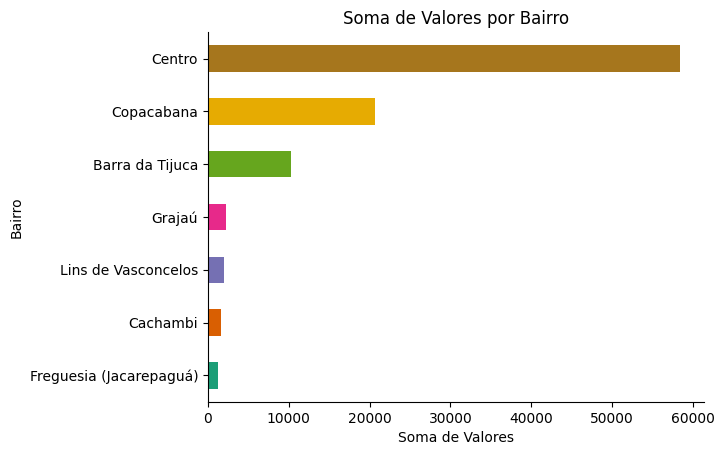

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Substitua '_df_5' pelo nome real do seu DataFrame
_df_5.groupby('Bairro')['SomaValores'].sum().sort_values().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Soma de Valores')
plt.ylabel('Bairro')
plt.title('Soma de Valores por Bairro')
plt.show()

#### Mostrando graficamente que entre os mais custo benefico o apartamento esta como mais caro entre os imóveis em conta


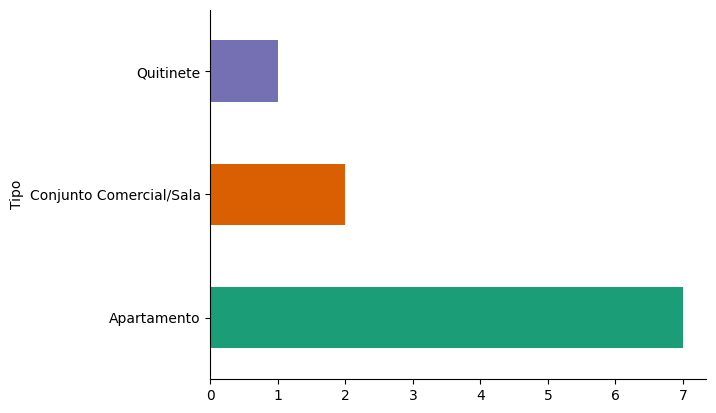

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Tipo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##Mostrando graficamente o bairro mais caro para se morar no rio de janeiro

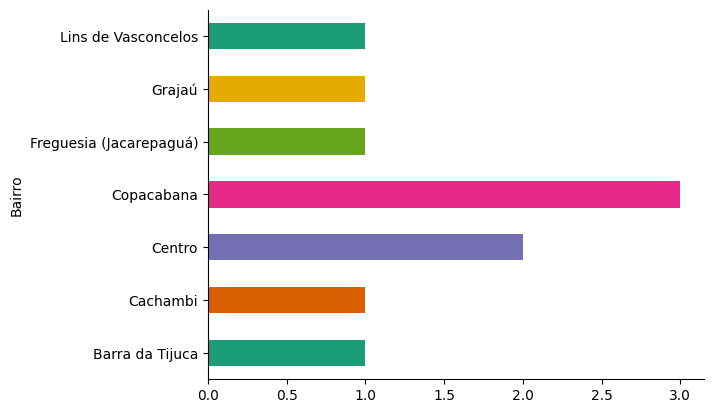

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Bairro').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)